# Machine learning with graphs

## Homework 1

Solution notebook for Homeworks proposed in the [MLG](http://jcid.webs.tsc.uc3m.es/machine-learning-group/) in the seminar of 2021 based on [Machine learning with graphs](http://snap.stanford.edu/class/cs224w-2019/) course by Standford university.

    Author: Daniel Bacaicoa Barber (23 feb, 2021)
    
<font size="1">This notebook may contain several errata. Use it at your own risk.</font>


We will give different solutions to problems (when possible) using different libraries. 

1. **Using Snap.py**
    M. Culler, N. M. Dunfield, M. Goerner, and J. R. Weeks, SnapPy, a computer program for studying the geometry and topology of 3-manifolds, http://snappy.computop.org

2. **Using NetworkX**
    Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008
    
3. **Using the adjacency matrix**




In [1]:
#Importing generic libraries.
import numpy as np
import pandas as pd
import scipy 

# Graph related libraries 
import snap
import networkx as nx

# Util library
from collections import Counter, OrderedDict

#Plotting library
import matplotlib.pyplot as plt

### Question 1. Analyzing the Wikipedia voters network

Download the Wikipedia voting network [wiki-Vote.txt.gz](http://snap.stanford.edu/data/wiki-Vote.html).

Using one of the network analysis tools above, load the Wikipedia voting network. Note that
Wikipedia is a directed network. Formally, we consider the Wikipedia network as a directed
graph $G = (V,E)$, with node set $V$ and edge set $E \subset V \times V$ where (edges are ordered pairs
of nodes). An edge $(a, b) \in E$ means that user $a$ voted on user $b$.

To make our questions clearer, we will use the following small graph as a running example:
$G_{small} = (V_{small}, E_{small})$, where $V_{small} = \{1, 2, 3\}$ and $E_{small} = \{(1, 2), (2, 1), (1, 3), (1, 1)\}$.

Compute and print out the following statistics for the **wiki-Vote** network:

In [2]:
#Loading data in Snap
#Using the function 'LoadEdgeList'
# LoadEdgeList(GraphType, InFNm, SrcColId=0, DstColId=1, Separator=' ')
#  GraphType: graph class   -- Class of output graph – one of TNGraph, TNEANet, or TUNGraph.
#  InFNm: string            -- Filename with the description of the graph edges.
#  (optional) SrcColId: int -- The column number in the file, which contains the node id representing the source vertex.
#  (optional) DstColId: int -- The column number in the file, which contains the node id representing the destination vertex

wiki_graph_sn = snap.LoadEdgeList(snap.TNGraph, "Wiki-Vote.txt", 0, 1)

In [3]:
#Loading data in NetworkX
wiki_graph_nx = nx.read_edgelist("Wiki-Vote.txt",create_using = nx.DiGraph(), nodetype = int)

3
8297


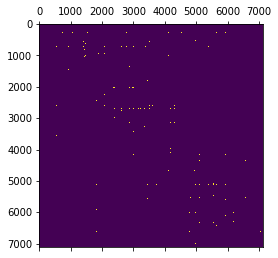

In [4]:
#We will also create a numpy array with the graph to use it just with standard libraries

#We first see that neither nodes are ordered nor posted as consecutive integer numbers 
nodes = np.array([node.GetId() for node in wiki_graph_sn.Nodes()])
print(np.min(nodes))
print(np.max(nodes))

nodes = np.sort(nodes)

wiki_mat = np.zeros([wiki_graph_sn.GetNodes(),wiki_graph_sn.GetNodes()],dtype=int)
for edge in wiki_graph_sn.Edges():
    i = np.where(nodes == edge.GetId()[0])
    j = np.where(nodes == edge.GetId()[1])
    wiki_mat[i,j] = 1

plt.matshow(wiki_mat)
plt.show()

1. The number of nodes in the network. ($G_{small}$ has 3 nodes.)

In [5]:
# With the snap library

n_nodes = wiki_graph_sn.GetNodes()
print('The number of nodes is: %i' %n_nodes)

The number of nodes is: 7115


In [6]:
# With the networkX library

n_nodes = wiki_graph_nx.number_of_nodes()
print('The number of nodes is: %i' %n_nodes)

The number of nodes is: 7115


In [7]:
#With the adjacency matrix

n_nodes = wiki_mat.shape[0]
print('The number of nodes is: %i' %n_nodes)

The number of nodes is: 7115


2. The number of nodes with a self-edge (self-loop), i.e., the number of nodes $a \in V$ where
$(a, a) \in E$. ($G_{small}$ has 1 self-edge.)

In [8]:
## With the snap library

##Ruddimentary way
#sel_loops = 0
#for edge in wiki_graph_sn.Edges():
#    if edge.GetId()[0]==edge.GetId()[1]:
#        sel_loops += 1

self_loops = wiki_graph_sn.CntSelfEdges()
print('The number of self_loops is: %i' %self_loops)        

The number of self_loops is: 0


In [9]:
## With the networkX library

loops = list(nx.selfloop_edges(wiki_graph_nx)) #we get the loop edges
print('The number of self_loops is: %i' %len(loops))     

The number of self_loops is: 0


In [10]:
#With the adjacency matrix

self_loops = int(np.sum(np.diag(wiki_mat)))
print('The number of self_loops is: %i' %self_loops)

The number of self_loops is: 0


3. The number of directed edges in the network, i.e., the number of ordered pairs $(a, b) \in E$
for which $a \neq b$. ($G_{small}$ has 3 directed edges.)

In [11]:
## With the snap library

directed_edges = wiki_graph_sn.GetEdges() - self_loops
print('The number of directed edges is: %i' %directed_edges)

The number of directed edges is: 103689


In [12]:
## With the networkX library

directed_edges = wiki_graph_nx.number_of_edges() - len(loops)
print('The number of directed edges is: %i' %directed_edges)

The number of directed edges is: 103689


In [13]:
#With the adjacency matrix

directed_edges = np.sum(wiki_mat) - self_loops
print('The number of directed edges is: %i' %directed_edges)

The number of directed edges is: 103689


4. The number of undirected edges in the network, i.e., the number of unique unordered pairs
$(a, b),\ a \neq b$, for which $(a, b) \in E$ or $(b, a) \in E$ (or both). If both $(a, b)$ and $(b, a)$ are edges,
this counts a single undirected edge. ($G_{small}$ has 2 undirected edges.)

In [14]:
## With the snap library

undir_wiki_graph_sn = wiki_graph_sn.GetUnDir() #Create de undirected graph related to the original

edges_undir = undir_wiki_graph_sn.GetEdges()
edges_dir = wiki_graph_sn.GetEdges()

single_edges =  edges_undir - edges_dir

print('Nodes in the directec graph: %i' %edges_dir)
print('Nodes in the undirectec graph: %i' %edges_undir)
print('One-way nodes in the directec graph: %i' %single_edges)

undirected_edges = (edges_dir-single_edges)/2 + single_edges
print('\n Undirected edges: %i' %undirected_edges)

Nodes in the directec graph: 103689
Nodes in the undirectec graph: 201524
One-way nodes in the directec graph: 97835

 Undirected edges: 100762


In [15]:
## With the networkX library

undir_wiki_graph_nx = wiki_graph_nx.to_undirected() #Create de undirected graph related to the original

edges_undir = 2 * undir_wiki_graph_nx.number_of_edges() #Careful! edges in the undirected graph are counted once
edges_dir = wiki_graph_nx.number_of_edges()

single_edges =  edges_undir - edges_dir

print('Nodes in the directec graph: %i' %edges_dir)
print('Nodes in the undirectec graph: %i' %edges_undir)
print('One-way nodes in the directec graph: %i' %single_edges)

undirected_edges = (edges_dir - single_edges)/2 + single_edges
print('\n Undirected edges: %i' %undirected_edges)

Nodes in the directec graph: 103689
Nodes in the undirectec graph: 201524
One-way nodes in the directec graph: 97835

 Undirected edges: 100762


In [16]:
## With the adjacency matrix

undir_wiki_mat = 1*((wiki_mat.T + wiki_mat)>0) #simply summing the adjacency matrix and its transpose we get positive values in each egde in both ways

edges_undir = np.sum(undir_wiki_mat)
edges_dir = np.sum(wiki_mat)

single_edges =  edges_undir - edges_dir

print('Nodes in the directec graph: %i' %edges_dir)
print('Nodes in the undirectec graph: %i' %edges_undir)
print('One-way nodes in the directec graph: %i' %single_edges)

undirected_edges = (edges_dir - single_edges)/2 + single_edges
print('\n Undirected edges: %i' %undirected_edges)

Nodes in the directec graph: 103689
Nodes in the undirectec graph: 201524
One-way nodes in the directec graph: 97835

 Undirected edges: 100762


5. The number of reciprocated edges in the network, i.e., the number of unique unordered
pairs of nodes $(a, b),\ a \neq b$, for which $(a, b) \in E$ and $(b, a) \in E$. ($G_{small}$ has 1 reciprocated
edge.)

In [17]:
# With any method and the calculation above

reciprocated_edges = (edges_dir-single_edges)/2
print('Reciprocated edges: %i' %reciprocated_edges)

Reciprocated edges: 2927


6. The number of nodes of zero out-degree. ($G_{small}$ has 1 node with zero out-degree.)

In [18]:
## With the snap library

zero_out_nodes = wiki_graph_sn.CntOutDegNodes(0)
print('Zero out-degree nodes: %i' %zero_out_nodes)

Zero out-degree nodes: 1005


In [19]:
## With the networkX library

out_deg = dict(wiki_graph_nx.out_degree)
zero_out_nodes = np.sum(np.array(list(out_deg.values()))==0)
print('Zero out-degree nodes: %i' %zero_out_nodes)

Zero out-degree nodes: 1005


In [20]:
## With the adjacency matrix

out_deg = np.sum(wiki_mat,axis=1) #K_out
zero_out_nodes = np.sum(out_deg==0)
print('Zero out-degree nodes: %i' %zero_out_nodes)

Zero out-degree nodes: 1005


7. The number of nodes of zero in-degree. ($G_{small}$ has 1 node with zero in-degree.)

In [21]:
## With the snap library

zero_in_nodes = wiki_graph_sn.CntInDegNodes(0)
print('Zero in-degree nodes: %i' %zero_in_nodes)

Zero in-degree nodes: 4734


In [22]:
## With the networkX library

in_deg = dict(wiki_graph_nx.in_degree)
zero_in_nodes = np.sum(np.array(list(in_deg.values()))==0)
print('Zero in-degree nodes: %i' %zero_in_nodes)

Zero in-degree nodes: 4734


In [23]:
## With the adjacency matrix

in_deg = np.sum(wiki_mat,axis=0) #K_in
zero_in_nodes = np.sum(in_deg==0)
print('Zero in-degree nodes: %i' %zero_in_nodes)

Zero in-degree nodes: 4734


8. The number of nodes with more than 10 outgoing edges (out-degree > 10).

In [24]:
## With the snap library

ten_out_nodes = 0
for item in wiki_graph_sn.GetOutDegCnt():
    if item.GetVal1() > 10:
        ten_out_nodes += item.GetVal2()
print('Nodes with more than 10 outgoing edges: %i' %ten_out_nodes)


Nodes with more than 10 outgoing edges: 1612


In [25]:
## With the networkX library

out_deg = dict(wiki_graph_nx.out_degree)
ten_out_nodes = np.sum(np.array(list(out_deg.values()))>10)
print('Nodes with more than 10 outgoing edges: %i' %ten_out_nodes)

Nodes with more than 10 outgoing edges: 1612


In [26]:
## With the adjacency matrix

out_deg = np.sum(wiki_mat,axis=1) #K_out
ten_out_nodes = np.sum(out_deg>10)
print('Nodes with more than 10 outgoing edges: %i' %ten_out_nodes)

Nodes with more than 10 outgoing edges: 1612


9. The number of nodes with fewer than 10 incoming edges (in-degree < 10).

In [27]:
## With the snap library

ten_in_nodes = 0
for item in wiki_graph_sn.GetInDegCnt():
    if item.GetVal1() < 10:
        ten_in_nodes += item.GetVal2()
print('Nodes with less than 10 ingoing edges: %i' %ten_in_nodes)

Nodes with less than 10 ingoing edges: 5165


In [28]:
## With the networkX library

in_deg = dict(wiki_graph_nx.in_degree)
ten_in_nodes = np.sum(np.array(list(in_deg.values()))<10)
print('Nodes with less than 10 ingoing edges: %i' %ten_in_nodes)

Nodes with less than 10 ingoing edges: 5165


In [29]:
## With the adjacency matrix

in_deg = np.sum(wiki_mat,axis=0) #K_in
ten_in_nodes = np.sum(in_deg<10)
print('Nodes with less than 10 ingoing edges: %i' %ten_in_nodes)

Nodes with less than 10 ingoing edges: 5165


### Question 2. Further Analyzing the Wikipedia voters network

For this problem, we use the Wikipedia voters network. If you are using Python, you might
want to use <code>NumPy, SciPy</code>, and/or <code>Matplotlib</code>libraries.

1. Plot the distribution of out-degrees of nodes in the network on a log-log scale.
Each data point is a pair $(x, y)$ where $x$ is a positive integer and $y$ is the number of nodes
in the network with out-degree equal to $x$. Restrict the range of $x$ between the minimum
and maximum out-degrees. You may filter out data points with a 0 entry. For the log-log
scale, use base 10 for both $x$ and $y$ axes.

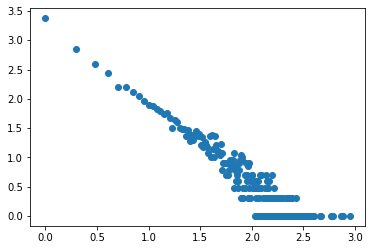

In [30]:
## With the snap library

degrees = []
for item in wiki_graph_sn.GetNodeOutDegV():
    degrees.append(item.GetVal2())
degrees = np.array(degrees) 
degrees = degrees[degrees>0] #filter out data points with a 0 entry
data = Counter(degrees)
x = np.log10(list(data.keys()))
y = np.log10(list(data.values()))

plt.scatter(x,y)
plt.show()

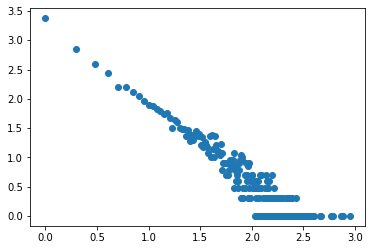

In [31]:
## With the networkX library

out_deg = dict(wiki_graph_nx.out_degree()) #dictionary {node: out_degree}
degrees = np.array(list(out_deg.values())) # list of all out degrees
degrees = degrees[degrees>0] #filter out data points with a 0 entry
data = Counter(degrees)
x = np.log10(list(data.keys()))
y = np.log10(list(data.values()))

plt.scatter(x,y)
plt.show()

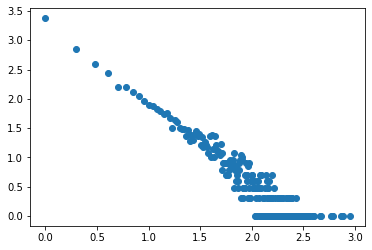

In [32]:
## With the adjacency matrix

degrees = np.sum(wiki_mat,axis=1) #K_out

degrees = degrees[degrees>0] #filter out data points with a 0 entry
data = Counter(degrees)
x = np.log10(list(data.keys()))
y = np.log10(list(data.values()))

plt.scatter(x,y)
plt.show()

2. Compute and plot the least-square regression line for the out-degree distribution
in the log-log scale plot. Note we want to find coefficients $a$ and $b$ such that the function
$\log_{10} y = a \cdot \log_{10} x + b$, equivalently, $y = 10^b \cdot x^a$, best fits the out-degree distribution.
What are the coefficients $a$ and $b$? For this part, you might want to use the method called
polyfit in NumPy with deg parameter equal to 1.

The result for the regression is,
 slope:    -1.281 
 intercept: 3.132


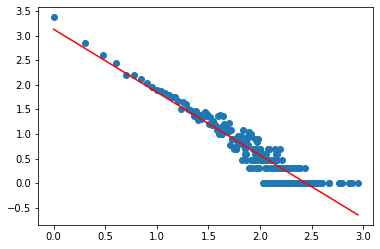

In [33]:
# With any method and the calculation above

z = np.polyfit(x, y, 1)
print('The result for the regression is,\n slope:    %0.3f \n intercept: %0.3f' %tuple(z))

plt.scatter(x,y)
plt.plot(np.sort(x),z[0]*np.sort(x)+z[1],'r')
plt.show()

### Question 3. Finding Experts on the Java Programming Language on
StackOverflow

Download the StackOverflow network [stackoverflow-Java.txt.gz](http://snap.stanford.edu/class/cs224w-data/hw0/stackoverflow-Java.txt.gz). An edge $(a, b)$ in the network
means that person $a$ endorsed an answer from person $b$ on a Java-related question.

Using one of the network analysis tools above, load the StackOverflow network. Note that
StackOverflow is a directed network.

Compute and print out the following statistics for the stackoverflow-Java network:

In [34]:
# With the snap library
stack_graph_sn = snap.LoadEdgeList(snap.TNGraph, "stackoverflow-Java.txt", 0, 1)

# With the networkx library
stack_graph_nx = nx.read_edgelist("stackoverflow-Java.txt",create_using = nx.DiGraph(), nodetype = int)


1. The number of weakly connected components in the network. This value can be calculated
in Snap.py via function GetWccs.

In [35]:
## With the snap library

n_Wcc=0
for i in stack_graph_sn.GetWccs():
    n_Wcc += 1
print('Number of weakly connected components is: %i' %n_Wcc) 

Number of weakly connected components is: 10143


In [36]:
## With the networkX library

n_Wcc = nx.number_weakly_connected_components(stack_graph_nx)
print('Number of weakly connected components is: %i' %n_Wcc) 

Number of weakly connected components is: 10143


2. The number of edges and the number of nodes in the largest weakly connected component.
The largest weakly connected component is calculated in Snap.py with function GetMxWcc.

In [37]:
## With the snap library

larg_Wcc = stack_graph_sn.GetMxWcc()
n_nodes_Larg_Wcc = larg_Wcc.GetNodes()
n_edges_Larg_Wcc = larg_Wcc.GetEdges()

print('The the largest weakly connected component has %i nodes and %i edges.' %(n_nodes_Larg_Wcc,n_edges_Larg_Wcc))

The the largest weakly connected component has 131188 nodes and 322486 edges.


In [38]:
## With the networkX library

larg_Wcc = max(nx.weakly_connected_components(stack_graph_nx),key=len)
n_nodes_Larg_Wcc = len(larg_Wcc)
Wcc_subgraph = stack_graph_nx.subgraph(max(nx.weakly_connected_components(stack_graph_nx)))
n_edges_Larg_Wcc = nx.number_of_edges(Wcc_subgraph)

print('The the largest weakly connected component has %i nodes and %i edges.' %(n_nodes_Larg_Wcc,n_edges_Larg_Wcc))



The the largest weakly connected component has 131188 nodes and 322486 edges.


3. IDs of the top 3 most central nodes in the network by PagePank scores. PageRank scores
are calculated in Snap.py with function GetPageRank.

In [39]:
## With the snap library

PRankH = stack_graph_sn.GetPageRank() #dict node: PRank_score;  Default options: C=0.85, Eps=0.0001, MaxIter=100 
scores = np.array(list(dict(PRankH).values()))
nodes = np.array(list(dict(PRankH).keys()))

positions = scores.argsort()[-3:][::-1] # We select the three bigest (selecting the last 3) and we reverse them [::-1]
nodes[positions]
print('The three most central nodes in the network by PagePank scores are:')
for i in positions:
    print('  Node %i with a score of %0.9f' %(nodes[i],scores[i]))

The three most central nodes in the network by PagePank scores are:
  Node 992484 with a score of 0.013980540
  Node 135152 with a score of 0.010005539
  Node 22656 with a score of 0.007103533


In [40]:
## With the networkX library (different tolerance)

PRank = nx.pagerank(stack_graph_nx, tol=1e-4) #alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None

scores = np.array(list(dict(PRank).values()))
nodes = np.array(list(dict(PRank).keys()))

positions = scores.argsort()[-3:][::-1] # We select the three bigest (selecting the last 3) and we reverse them [::-1]
nodes[positions]
print('The three most central nodes in the network by PagePank scores are:')
for i in positions:
    print('  Node %i with a score of %0.9f' %(nodes[i],scores[i]))

The three most central nodes in the network by PagePank scores are:
  Node 22656 with a score of 0.007717139
  Node 157882 with a score of 0.005653757
  Node 571407 with a score of 0.005147897


In [41]:
## With the networkX library

PRank = nx.pagerank(stack_graph_nx, tol=1e-6) #alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None

scores = np.array(list(dict(PRank).values()))
nodes = np.array(list(dict(PRank).keys()))

positions = scores.argsort()[-3:][::-1] # We select the three bigest (selecting the last 3) and we reverse them [::-1]
nodes[positions]
print('The three most central nodes in the network by PagePank scores are:')
for i in positions:
    print('  Node %i with a score of %0.9f' %(nodes[i],scores[i]))

The three most central nodes in the network by PagePank scores are:
  Node 992484 with a score of 0.007854822
  Node 22656 with a score of 0.007686203
  Node 139985 with a score of 0.006191751


4. IDs of the top 3 hubs and top 3 authorities in the network by HITS scores. HITS scores
are calculated in Snap.py with function GetHits.

In [42]:
def Dict_top_k_score(dictionary,k):
    nodes = np.array(list(dictionary.keys()))
    scores = np.array(list(dictionary.values()))
    
    positions = scores.argsort()[-k]
    return nodes[positions],scores[positions]


In [43]:
## With the snap library

NIdHubH, NIdAuthH = stack_graph_sn.GetHits()

print('The top 3 hubs are:')
for i in range(1,4):
    print('  Node %i with a score of %0.9f' %Dict_top_k_score(dict(NIdHubH),i))
    
print('\nThe top 3 authors are:')
for i in range(1,4):
    print('  Node %i with a score of %0.9f' %Dict_top_k_score(dict(NIdAuthH),i))

The top 3 hubs are:
  Node 892029 with a score of 0.073363804
  Node 1194415 with a score of 0.059550744
  Node 359862 with a score of 0.056875646

The top 3 authors are:
  Node 22656 with a score of 0.604723973
  Node 157882 with a score of 0.298699349
  Node 571407 with a score of 0.283907193


In [44]:
## With the networkX library

Hubs, Authorities = nx.hits(stack_graph_nx)

print('The top 3 hubs are:')
for i in range(1,4):
    print('  Node %i with a score of %0.9f' %Dict_top_k_score(Hubs,i))
    
print('\nThe top 3 authors are:')
for i in range(1,4):
    print('  Node %i with a score of %0.9f' %Dict_top_k_score(Authorities,i))

The top 3 hubs are:
  Node 892029 with a score of 0.000603874
  Node 1194415 with a score of 0.000490176
  Node 359862 with a score of 0.000468157

The top 3 authors are:
  Node 22656 with a score of 0.027003430
  Node 157882 with a score of 0.013338124
  Node 571407 with a score of 0.012677599
